In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
#from pymc3 import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/ExtraversionData.csv')
df

race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  \
0         3   53       1       1     1       1      US   4   2   5  ...   4   
1        13   46       1       2     1       1      US   2   2   3  ...   3   
2         1   14       2       2     1       1      PK   5   1   1  ...   4   
3         3   19       2       2     1       1      RO   2   5   2  ...   4   
4        11   25       2       2     1       2      US   3   1   3  ...   3   
...     ...  ...     ...     ...   ...     ...     ...  ..  ..  ..  ...  ..   
19714    11   15       1       2     1       2      SG   1   4   3  ...   1   
19715     3   37       1       2     1       2      US   2   3   2  ...   1   
19716     5   16       2       1     1       2      US   2   5   4  ...   5   
19717    12   16       1       1     1       5      NG   1   4   2  ...   3   
19718     3   35       1       1     1       1      US   2   3   1  ...   5   

       O2  O3  O4  O5  O6  O7  O8  O9  O10  
0       1   3   1   5   1   4   2   5    5  
1       3   3   3   2   3   3   1   3    2  
2       5   5   1   5   1   5   5   5    5  
3       3   5   2   4   2   5   2   5    5  
4       1   1   1   3   1   3   1   5    3  
...    ..  ..  ..  ..  ..  ..  ..  ..  ...  
19714   3   5   3   4   1   4   2   5    3  
19715   2   3   2   3   3   4   2   3    3  
19716   3   1   3   4   1   1   5   5    5  
19717   2   5   3   4   1   5   3   5    5  
19718   1   5   1   4   1   5   5   5    5  

[19719 rows x 57 columns]

In [7]:
reverse_values_dict = {5:1, 4:2, 3:3, 2:4, 1:5}
df = df.replace({'E2': reverse_values_dict})
df = df.replace({'E4': reverse_values_dict})
df = df.replace({'E6': reverse_values_dict})
df = df.replace({'E8': reverse_values_dict})
df = df.replace({'E10': reverse_values_dict})
df = df.replace({'N2': reverse_values_dict})
df = df.replace({'N4': reverse_values_dict})
df = df.replace({'A1': reverse_values_dict})
df = df.replace({'A3': reverse_values_dict})
df = df.replace({'A5': reverse_values_dict})
df = df.replace({'A7': reverse_values_dict})
df = df.replace({'C2': reverse_values_dict})
df = df.replace({'C4': reverse_values_dict})
df = df.replace({'C6': reverse_values_dict})
df = df.replace({'C8': reverse_values_dict})
df = df.replace({'C10': reverse_values_dict})
df = df.replace({'O2': reverse_values_dict})
df = df.replace({'O4': reverse_values_dict})
df = df.replace({'E6': reverse_values_dict})

df

race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  \
0         3   53       1       1     1       1      US   4   4   5  ...   4   
1        13   46       1       2     1       1      US   2   4   3  ...   3   
2         1   14       2       2     1       1      PK   5   5   1  ...   4   
3         3   19       2       2     1       1      RO   2   1   2  ...   4   
4        11   25       2       2     1       2      US   3   5   3  ...   3   
...     ...  ...     ...     ...   ...     ...     ...  ..  ..  ..  ...  ..   
19714    11   15       1       2     1       2      SG   1   2   3  ...   1   
19715     3   37       1       2     1       2      US   2   3   2  ...   1   
19716     5   16       2       1     1       2      US   2   1   4  ...   5   
19717    12   16       1       1     1       5      NG   1   2   2  ...   3   
19718     3   35       1       1     1       1      US   2   3   1  ...   5   

       O2  O3  O4  O5  O6  O7  O8  O9  O10  
0       5   3   5   5   1   4   2   5    5  
1       3   3   3   2   3   3   1   3    2  
2       1   5   5   5   1   5   5   5    5  
3       3   5   4   4   2   5   2   5    5  
4       5   1   5   3   1   3   1   5    3  
...    ..  ..  ..  ..  ..  ..  ..  ..  ...  
19714   3   5   3   4   1   4   2   5    3  
19715   4   3   4   3   3   4   2   3    3  
19716   3   1   3   4   1   1   5   5    5  
19717   4   5   3   4   1   5   3   5    5  
19718   5   5   5   4   1   5   5   5    5  

[19719 rows x 57 columns]

In [8]:
df.dataframeName = '"Big Five" personality traits scores'
df['score_O'] =  (df['O1'] + df['O2'] + df['O3'] + df['O4'] + df['O5'] + df['O6'] + df['O7'] + df['O8' ] + df['O9'] + df['O10']) / 10
df['score_C'] =  (df['C1'] + df['C2'] + df['C3'] + df['C4'] + df['C5'] + df['C6'] + df['C7'] + df['C8' ] + df['C9'] + df['C10']) / 10    
df['score_E'] =  (df['E1'] + df['E2'] + df['E3'] + df['E4'] + df['E5'] + df['E6'] + df['E7'] + df['E8' ] + df['E9'] + df['E10']) / 10
df['score_A'] =  (df['A1'] + df['A2'] + df['A3'] + df['A4'] + df['A5'] + df['A6'] + df['A7'] + df['A8' ] + df['A9'] + df['A10']) / 10
df['score_N'] =  (df['N1'] + df['N2'] + df['N3'] + df['N4'] + df['N5'] + df['N6'] + df['N7'] + df['N8' ] + df['N9'] + df['N10']) / 10           
df = df[['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'score_O','score_C', 'score_E' ,'score_A' ,'score_N',  ]]
df

race  age  engnat  gender  hand  source country  score_O  score_C  \
0         3   53       1       1     1       1      US      3.9      4.3   
1        13   46       1       2     1       1      US      2.6      4.0   
2         1   14       2       2     1       1      PK      4.1      4.5   
3         3   19       2       2     1       1      RO      3.9      2.6   
4        11   25       2       2     1       2      US      3.0      3.4   
...     ...  ...     ...     ...   ...     ...     ...      ...      ...   
19714    11   15       1       2     1       2      SG      3.1      3.4   
19715     3   37       1       2     1       2      US      3.0      3.2   
19716     5   16       2       1     1       2      US      3.3      1.9   
19717    12   16       1       1     1       5      NG      3.8      3.9   
19718     3   35       1       1     1       1      US      4.5      3.2   

       score_E  score_A  score_N  
0          4.0      4.6      1.1  
1          2.2      3.5      3.1  
2          3.1      3.8      4.6  
3          2.4      3.7      4.3  
4          3.0      4.4      3.0  
...        ...      ...      ...  
19714      2.1      4.2      4.1  
19715      2.5      3.6      2.1  
19716      2.5      2.6      5.0  
19717      2.3      3.8      4.0  
19718      2.4      3.5      3.7  

[19719 rows x 12 columns]

In [7]:
# write output to file
!mkdir data
df.to_csv("data/ProcessedDataExtraversion.csv", index=False)

Nettle's research demonstrated that for UK citizens, an increased presence of extraversion has a positive relation to number of sexual partners, thus increasing fitness. More extraverted individuals can secure mates of higher quality as they were more likely to break off a relationship. Men are seen to have more sexual partners while women experience higher rates of serial monogamy. Nettle's research focused on UK citizens of all ages and genders. We would like to explore 
A) if country has an effect on extraversion rates, i.e. if countries have different rates of extraversion (different median extraversion scores)
B) if race, age, gender, or scores on the other four personality traits has a correlation with extraversion rates and why.

Import R for better visualizations regarding country and extraversion

In [8]:
# RUN THIS ONCE 
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318072 sha256=ac5e34079407bdb45939e6190e978787506a8c1df4fa21f972068a3cc097ffe4
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


In [9]:
# suppress warnings that come with installing the wordcloud package 
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import logging
rpy2_logger.setLevel(logging.ERROR)

In [10]:
%%R
# this will run for a long time, don't be alarmed 
install.packages("wordcloud")
install.packages("ggrepel")

In [17]:
%%R 
library('tidyverse') 
library('wordcloud')
library('ggrepel')
df <- read_csv('/content/data/ProcessedDataExtraversion.csv')
df

Rows: 19719 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): country
dbl (11): race, age, engnat, gender, hand, source, score_O, score_C, score_E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 19,719 × 12
    race   age engnat gender  hand source country score_O score_C score_E
   <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl> <chr>     <dbl>   <dbl>   <dbl>
 1     3    53      1      1     1      1 US          3.9     4.3     4  
 2    13    46      1      2     1      1 US          2.6     4       2.2
 3     1    14      2      2     1      1 PK          4.1     4.5     3.1
 4     3    19      2      2     1      1 RO          3.9     2.6     2.4
 5    11    25      2      2     1      2 US          3       3.4     3  
 6    13    31      1      2     1      2 US          3.7     3.1     1.6
 7     5   

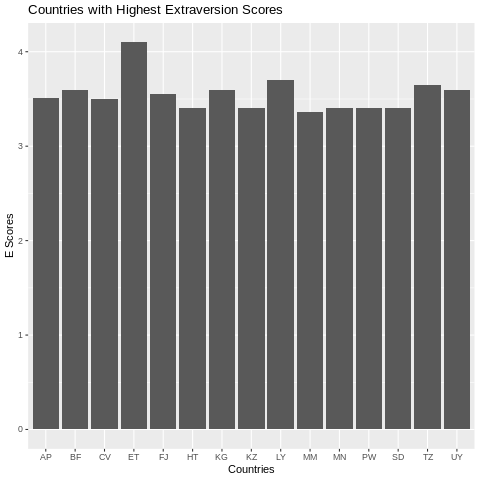

In [18]:
%%R 
# average extraversion by country
median_country <- df %>% group_by(country) %>% summarize(avg_E=mean(score_E))
median_country2 <- median_country %>% arrange(desc(avg_E))
# view a bar chart, ordered by Extraversion score 
median_country2 %>% slice_head(n=15) %>% ggplot(aes(x=country, y=avg_E)) + geom_col() + labs(title="Countries with Highest Extraversion Scores", x ="Countries", y = "E Scores")

In [ ]:
%%R
print(median_country2, n=159)

From this data, we can see that the UK was not one of the countries with the highest extraversion scores. In fact, Great Britain has an average extraversion score of 2.92, coming in at 62/149. The countries with the highest mean extraversion scores are Ethiopia, Libya, and Tanzania, respectively. Because Nettle used extraversion scores from a country with a relatively central extraversion score (meaning the UK likely has citizens on both ends of the spectrum), his conclusions relating to the positive relation of extraversion to fitness is applicable because he did not test an outlier population.

Now we will run linear regressions to see if the other four personality traits has a correlation with extraversion rates and why.

In [8]:
# how does agreeableness predict extraversion ? 

y = df["score_E"]

X = df["score_A"]

model_agreeableness_e = sm.OLS(y,sm.add_constant(X))
results_agreeableness_e = model_agreeableness_e.fit()
print(results_agreeableness_e.summary())
r_AE = results_agreeableness_e.resid
bhat, ahat = results_agreeableness_e.params

                            OLS Regression Results                            
Dep. Variable:                score_E   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2055.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:43:03   Log-Likelihood:                -22136.
No. Observations:               19719   AIC:                         4.428e+04
Df Residuals:                   19717   BIC:                         4.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6113      0.029     55.644      0.0

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(X,y,"o",label="data")
ax.plot(X,X*ahat + bhat,"-",label="fit") 
ax.legend()

In [10]:
# how does openness predict extraversion ? 

y = df["score_E"]

X = df["score_O"]

model_agreeableness_e = sm.OLS(y,sm.add_constant(X))
results_agreeableness_e = model_agreeableness_e.fit()
print(results_agreeableness_e.summary())
r_OE = results_agreeableness_e.resid
bhat, ahat = results_agreeableness_e.params

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(X,y,"o",label="data")
ax.plot(X,X*ahat + bhat,"-",label="fit") 
ax.legend()

                            OLS Regression Results                            
Dep. Variable:                score_E   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     152.7
Date:                Sun, 28 May 2023   Prob (F-statistic):           5.93e-35
Time:                        17:43:12   Log-Likelihood:                -23037.
No. Observations:               19719   AIC:                         4.608e+04
Df Residuals:                   19717   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4284      0.039     62.744      0.0

In [11]:
# how does conscientiousness predict extraversion ? 

y = df["score_E"]

X = df["score_C"]

model_agreeableness_e = sm.OLS(y,sm.add_constant(X))
results_agreeableness_e = model_agreeableness_e.fit()
print(results_agreeableness_e.summary())
r_CE = results_agreeableness_e.resid
bhat, ahat = results_agreeableness_e.params

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(X,y,"o",label="data")
ax.plot(X,X*ahat + bhat,"-",label="fit") 
ax.legend()

                            OLS Regression Results                            
Dep. Variable:                score_E   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 28 May 2023   Prob (F-statistic):           1.73e-36
Time:                        17:43:14   Log-Likelihood:                -23033.
No. Observations:               19719   AIC:                         4.607e+04
Df Residuals:                   19717   BIC:                         4.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5538      0.028     90.967      0.0

In [12]:
# how does neuroticism predict extraversion ? 

y = df["score_E"]

X = df["score_N"]

model_agreeableness_e = sm.OLS(y,sm.add_constant(X))
results_agreeableness_e = model_agreeableness_e.fit()
print(results_agreeableness_e.summary())
r_NE = results_agreeableness_e.resid
bhat, ahat = results_agreeableness_e.params

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(X,y,"o",label="data")
ax.plot(X,X*ahat + bhat,"-",label="fit") 
ax.legend()

                            OLS Regression Results                            
Dep. Variable:                score_E   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1382.
Date:                Sun, 28 May 2023   Prob (F-statistic):          2.04e-292
Time:                        17:43:16   Log-Likelihood:                -22445.
No. Observations:               19719   AIC:                         4.489e+04
Df Residuals:                   19717   BIC:                         4.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6202      0.020    180.461      0.0

From these regression, we can see that agreeableness is the best predictor of extraversion score (out of the four other personality traits) with an R-squared value of 0.094. While this value is not greater than 0.7, thus not significant enough to be a true "goodness of fit" we would like to explore why there is such a stronger correlation between agreeableness and the other scores (openness and conscientiousness with an R-squared = 0.008 and neuroticism with an R-squared=0.065). 

Simulations for Game

In [ ]:
import random
!pip quantecon
n_sim = 100
list_b = []
list_c1 = []
list_c2 = []
list_2pp_1 = []
list_ppnn_1 = []
list_nnpp_1 = []
list_2nn_1 = []
list_2pp_2 = []
list_ppnn_2 = []
list_nnpp_2 = []
list_2nn_2 = []
for i in range(n_sim):
  # create an array with Player 1 payoffs
  b = random.randint(0, 10)
  c1 = random.randint(0, 10)
  c2 = random.randint(0, 10)
  list_b.append(b)
  list_c1.append(c1)
  list_c2.append(c2)
  x = np.array([[b-c1, b],[-c1, -c2]])
  # re-label the rows and columns
  opm=pd.DataFrame(x, columns=['Positive Polly', 'Negative Nancy'])
  opm.index = ['Positive Polly', 'Negative Nancy']
  print(opm)

  # create Player 2's payoff matrix
  tpm=opm.T
  print(tpm)

  # write the payoff function
  def payoff_function (x=str, y=str):
      if x == 'Positive Polly' and y == 'Positive Polly':
          list_2pp_1.append(b-c1)
          list_2pp_2.append(b-c1)
      elif x == 'Positive Polly' and y == 'Negative Nancy':
          list_ppnn_1.append(-c1)
          list_ppnn_2.append(b)
      elif x == 'Negative Nancy' and y == 'Negative Nancy':
          list_2nn_1.append(-c2)
          list_2nn_2.append(-c2)
      else:
          list_nnpp_1.append(b)
          list_nnpp_2.append(-c1)

  (payoff_function('Positive Polly', 'Positive Polly'))
  (payoff_function('Positive Polly', 'Negative Nancy'))
  (payoff_function('Negative Nancy', 'Positive Polly'))
  (payoff_function('Negative Nancy', 'Negative Nancy'))

In [31]:
df_sim_game = pd.DataFrame(np.column_stack([list_b, list_c1, list_c2, list_2pp_1, list_2pp_2, list_ppnn_1, list_ppnn_2, list_nnpp_1, list_nnpp_2, list_2nn_1, list_2nn_2]), 
                               columns=['b', 'c1', 'c2', 'P1 Payoff Both Positive', 'P2 Payoff Both Positive', 'P1 Payoff 1: Postive, 2: Negative', 'P2 Payoff 1: Postive, 2: Negative', 'P1 Payoff 1: Negative, 2: Positive', 'P2 Payoff 1: Negative, 2: Positive', 'P1 Payoff Both Negative', 'P2 Payoff Both Negative'])

In [32]:
df_sim_game

b  c1  c2  P1 Payoff Both Positive  P2 Payoff Both Positive  \
0   0   9   2                       -9                       -9   
1   0   3   7                       -3                       -3   
2   5   4   5                        1                        1   
3   2   1   4                        1                        1   
4   0   3   7                       -3                       -3   
.. ..  ..  ..                      ...                      ...   
95  3   6   5                       -3                       -3   
96  5   2   5                        3                        3   
97  8   9  10                       -1                       -1   
98  0  10   5                      -10                      -10   
99  5   2   4                        3                        3   

    P1 Payoff 1: Postive, 2: Negative  P2 Payoff 1: Postive, 2: Negative  \
0                                  -9                                  0   
1                                  -3                                  0   
2                                  -4                                  5   
3                                  -1                                  2   
4                                  -3                                  0   
..                                ...                                ...   
95                                 -6                                  3   
96                                 -2                                  5   
97                                 -9                                  8   
98                                -10                                  0   
99                                 -2                                  5   

    P1 Payoff 1: Negative, 2: Positive  P2 Payoff 1: Negative, 2: Positive  \
0                                    0                                  -9   
1                                    0                                  -3   
2                                    5                                  -4   
3                                    2                                  -1   
4                                    0                                  -3   
..                                 ...                                 ...   
95                                   3                                  -6   
96                                   5                                  -2   
97                                   8                                  -9   
98                                   0                                 -10   
99                                   5                                  -2   

    P1 Payoff Both Negative  P2 Payoff Both Negative  
0                        -2                       -2  
1                        -7                       -7  
2                        -5                       -5  
3                        -4                       -4  
4                        -7                       -7  
..                      ...                      ...  
95                       -5                       -5  
96                       -5                       -5  
97                      -10                      -10  
98                       -5                       -5  
99                       -4                       -4  

[100 rows x 11 columns]

Find frequency of Negative Nancy and Positive Polly for each country 

In [97]:
%%R 
# average extraversion and agreeableness by country --> group by combined extraversion and agreableness score
pos_country <- df %>% group_by(country) %>% summarize(avg_EA=mean(score_E) + mean(score_A))
pos_country_desc <- pos_country %>% arrange(desc(avg_EA))
print(pos_country_desc, n=80)

# A tibble: 159 × 2
   country avg_EA
   <chr>    <dbl>
 1 ET        9   
 2 CV        8.3 
 3 KZ        8.2 
 4 AO        8   
 5 FJ        7.85
 6 MN        7.85
 7 PW        7.8 
 8 LA        7.8 
 9 MR        7.8 
10 LY        7.7 
11 BF        7.7 
12 TZ        7.65
13 VC        7.65
14 VI        7.65
15 SD        7.6 
16 UY        7.6 
17 AP        7.57
18 HT        7.55
19 IM        7.5 
20 MM        7.47
21 GG        7.4 
22 RW        7.35
23 BE        7.24
24 PA        7.22
25 NG        7.21
26 KG        7.2 
27 PG        7.2 
28 BM        7.2 
29 GE        7.12
30 LK        7.11
31 AG        7.1 
32 AS        7.1 
33 LB        7.1 
34 LS        7.1 
35 DK        7.08
36 BH        7.07
37 GH        7.06
38 MA        7.02
39 IE        7.01
40 TR        7.00
41 MU        7   
42 KW        6.97
43 BS        6.95
44 NO        6.94
45 ZA        6.92
46 BO        6.9 
47 IS        6.89
48 AE        6.89
49 NZ        6.88
50 BB        6.85
51 NI        6.85
52 PR        6.84
53 NL   

In [ ]:
%%R 
# average extraversion and agreableness by country --> group by combined agreabless and openness score
pos_country <- df %>% group_by(country) %>% summarize(avg_EA=mean(score_E) + mean(score_A))
pos_country_asc <- pos_country %>% arrange(avg_EA)
print(pos_country_asc)

GY has the lowest average Extraversion and Agreebleness score, ET has the highest. Let's find the frequency of Negative Nancy/Positive Polly


High value w/ lots of subjects: BE, Belgium (#23, 7.24)

Middle value w/ lots of subjects: GB, Great Britain, (#77, 6.7)

Low value w/ lots of subject: SK, Slovakia (#149, 5.85)

In [34]:
%%R
SK <- df %>% filter(country == 'SK')
SK

# A tibble: 22 × 12
    race   age engnat gender  hand source country score_O score_C score_E
   <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl> <chr>     <dbl>   <dbl>   <dbl>
 1     3    20      2      1     1      1 SK          3.8     2.4     2.4
 2     3    19      2      2     1      1 SK          4.1     2.9     3.3
 3     3    16      2      2     1      1 SK          2.9     3.2     1.4
 4     3    16      2      2     1      1 SK          4.6     3.8     1.8
 5     3    39      2      1     1      1 SK          3.9     2.4     2.3
 6     3    39      2      1     1      5 SK          4.3     3.1     2.5
 7     3    20      2      1     1      1 SK          3.4     2.6     2.3
 8     3    17      2      2     1      2 SK          3.3     2.2     1.8
 9     3    17      2      2     1      2 SK          4.2     1.9     1.6
10     3    23      2      2     1      1 SK          3.3     2.4     2  
# ℹ 12 more rows
# ℹ 2 more variables: score_A <dbl>, score_N <dbl>
# ℹ Use `print(n = ...)`

In [36]:
%%R
SK_EA <- SK %>% summarize(EA=(score_E + score_A)/2)
print(SK_EA, n=22)

# A tibble: 22 × 1
      EA
   <dbl>
 1  2.65
 2  2.7 
 3  2.45
 4  3   
 5  2.45
 6  2.9 
 7  2.5 
 8  1.85
 9  2.75
10  2.6 
11  2.75
12  3.15
13  3   
14  3.25
15  2.9 
16  2.4 
17  3.85
18  3.15
19  3.7 
20  4.15
21  2.95
22  3.2 


7/22 Positive Polly ~ 32%

15/22 Negative Nancy ~ 68%

In [104]:
%%R
BE <- df %>% filter(country == 'BE')
BE

# A tibble: 86 × 12
    race   age engnat gender  hand source country score_O score_C score_E
   <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl> <chr>     <dbl>   <dbl>   <dbl>
 1     3    23      2      2     1      2 BE          3.1     3.5     2.1
 2     3    21      2      2     1      1 BE          4.5     2.7     3.1
 3     3    21      2      2     1      1 BE          4.1     2.8     3.2
 4     3    34      2      1     1      1 BE          4.6     2.7     3.1
 5     3    49      2      1     1      1 BE          4       4       3.7
 6     3    22      2      1     1      1 BE          3.7     2.6     2.4
 7     3    24      1      1     1      1 BE          3.7     2.7     4.4
 8     3    48      2      1     1      2 BE          4.4     3.1     3.5
 9    13    18      2      1     1      1 BE          3.2     2.8     2.3
10     1    31      1      1     1      1 BE          4.3     2.7     4.1
# ℹ 76 more rows
# ℹ 2 more variables: score_A <dbl>, score_N <dbl>
# ℹ Use `print(n = ...)`

In [107]:
%%R
BE_EA <- BE %>% summarize(EA_BE=(score_E + score_A)/2)
BE_EA <- BE_EA %>% arrange(EA_BE)
print(BE_EA, n=86)

# A tibble: 86 × 1
   EA_BE
   <dbl>
 1  1.4 
 2  2.2 
 3  2.35
 4  2.55
 5  2.6 
 6  2.85
 7  2.95
 8  3   
 9  3.05
10  3.05
11  3.05
12  3.1 
13  3.1 
14  3.1 
15  3.1 
16  3.15
17  3.2 
18  3.2 
19  3.25
20  3.3 
21  3.35
22  3.4 
23  3.4 
24  3.45
25  3.45
26  3.5 
27  3.5 
28  3.5 
29  3.5 
30  3.5 
31  3.5 
32  3.55
33  3.55
34  3.55
35  3.6 
36  3.6 
37  3.6 
38  3.6 
39  3.6 
40  3.65
41  3.65
42  3.65
43  3.65
44  3.7 
45  3.75
46  3.75
47  3.75
48  3.75
49  3.75
50  3.75
51  3.8 
52  3.8 
53  3.8 
54  3.8 
55  3.85
56  3.85
57  3.9 
58  3.9 
59  3.9 
60  3.95
61  3.95
62  3.95
63  3.95
64  4   
65  4   
66  4   
67  4   
68  4.05
69  4.05
70  4.05
71  4.1 
72  4.1 
73  4.15
74  4.15
75  4.15
76  4.15
77  4.2 
78  4.25
79  4.25
80  4.25
81  4.25
82  4.3 
83  4.3 
84  4.35
85  4.35
86  4.4 


78/86 Positive Pollys ~ 91%

8/86 Negative Nancys ~ 9%

In [82]:
%%R
GB <- df %>% filter(country == 'GB')
GB

# A tibble: 1,531 × 12
    race   age engnat gender  hand source country score_O score_C score_E
   <dbl> <dbl>  <dbl>  <dbl> <dbl>  <dbl> <chr>     <dbl>   <dbl>   <dbl>
 1     3    26      1      2     3      5 GB          3.5     4.4     2.2
 2     3    15      1      2     2      1 GB          2.7     1.9     1.8
 3     3    15      1      1     1      1 GB          4       3.4     1.9
 4     3    18      1      2     1      5 GB          4       1.8     2.1
 5     3    14      1      3     1      1 GB          3.2     2       2.6
 6     3    21      1      2     1      1 GB          4       2.3     3  
 7     3    13      1      1     1      1 GB          3.8     2.9     2.7
 8     3    16      1      1     1      1 GB          3.5     2.9     2.7
 9     3    26      1      2     1      5 GB          3.5     3.6     2.4
10     3    18      1      1     1      1 GB          3.7     2.6     3.8
# ℹ 1,521 more rows
# ℹ 2 more variables: score_A <dbl>, score_N <dbl>
# ℹ Use `print(n =

Scoring ranges from 1-5, so Positive Polly if > 3, Negative Nancy if < 3

In [86]:
%%R
GB_EA <- GB  %>% summarize(EA=(score_E + score_A)/2)
GB_EA

# A tibble: 1,531 × 1
      EA
   <dbl>
 1  2.8 
 2  2.35
 3  3   
 4  2.55
 5  3.1 
 6  3.8 
 7  2.85
 8  2.75
 9  3.3 
10  3.2 
# ℹ 1,521 more rows
# ℹ Use `print(n = ...)` to see more rows


In [94]:
%%R
GB_EA <- GB_EA %>% arrange(EA)


1069/1521 Positive Polly ~ 70%

452/1521 Negative Nancy ~ 30%

Percentages:

NP (Nepal): 40% PP, 60% NN

GH (Ghana): 65% PP, 35% NN

DK (Denmark): 82% PP, 18% NN

See if correlation between GDP and avergae extraversion or agreeableness score per country

In [9]:
df

race  age  engnat  gender  hand  source country  score_O  score_C  \
0         3   53       1       1     1       1      US      3.9      4.3   
1        13   46       1       2     1       1      US      2.6      4.0   
2         1   14       2       2     1       1      PK      4.1      4.5   
3         3   19       2       2     1       1      RO      3.9      2.6   
4        11   25       2       2     1       2      US      3.0      3.4   
...     ...  ...     ...     ...   ...     ...     ...      ...      ...   
19714    11   15       1       2     1       2      SG      3.1      3.4   
19715     3   37       1       2     1       2      US      3.0      3.2   
19716     5   16       2       1     1       2      US      3.3      1.9   
19717    12   16       1       1     1       5      NG      3.8      3.9   
19718     3   35       1       1     1       1      US      4.5      3.2   

       score_E  score_A  score_N  
0          4.0      4.6      1.1  
1          2.2      3.5      3.1  
2          3.1      3.8      4.6  
3          2.4      3.7      4.3  
4          3.0      4.4      3.0  
...        ...      ...      ...  
19714      2.1      4.2      4.1  
19715      2.5      3.6      2.1  
19716      2.5      2.6      5.0  
19717      2.3      3.8      4.0  
19718      2.4      3.5      3.7  

[19719 rows x 12 columns]

In [10]:
df_grouped = df.groupby(['country']).mean()
df_grouped

race        age    engnat    gender      hand    source  \
country                                                                 
(nu       5.579946  38.967480  1.365854  1.601626  1.135501  2.116531   
A1        6.375000  23.000000  1.875000  1.500000  1.000000  1.625000   
A2        4.555556  22.777778  2.000000  1.222222  1.000000  2.000000   
AE        5.760000  47.510000  1.660000  1.610000  1.050000  1.910000   
AG       13.000000  24.000000  1.000000  2.000000  1.000000  2.000000   
...            ...        ...       ...       ...       ...       ...   
VI        2.000000  58.500000  1.000000  2.000000  1.000000  1.000000   
VN       11.100000  22.133333  1.933333  1.733333  1.133333  1.966667   
ZA        6.631285  30.201117  1.480447  1.597765  1.117318  1.530726   
ZM        6.500000  17.000000  1.500000  2.000000  1.000000  1.000000   
ZW        9.666667  42.333333  1.333333  1.333333  1.000000  1.333333   

          score_O   score_C   score_E   score_A   score_N  
country                                                    
(nu      3.670461  3.265583  2.875339  3.838753  3.146883  
A1       3.275000  3.050000  2.987500  3.737500  2.812500  
A2       3.511111  3.177778  2.688889  3.511111  3.255556  
AE       3.449000  3.266000  2.978000  3.909000  3.288000  
AG       3.600000  3.600000  2.800000  4.300000  4.300000  
...           ...       ...       ...       ...       ...  
VI       3.350000  3.050000  3.050000  4.600000  2.300000  
VN       3.543333  3.110000  2.673333  3.550000  3.090000  
ZA       3.775978  3.315084  2.947486  3.977095  2.974302  
ZM       3.900000  3.400000  2.850000  3.650000  2.900000  
ZW       3.966667  3.200000  2.533333  4.200000  3.500000  

[158 rows x 11 columns]

In [12]:
df2 = pd.read_csv('/content/GDPdata.csv')
df2

Index                    Country ISO-3166 Code  CC Num  Region Number  \
0        1                Afghanistan            AF       4             34   
1        2              Aland Islands            AX     248            154   
2        3                    Albania            AL       8             39   
3        4                    Algeria            DZ      12             15   
4        5             American Samoa            AS      16             61   
..     ...                        ...           ...     ...            ...   
253    254  Wallis and Futuna Islands            WF     876             61   
254    255             Western Sahara            EH     732             15   
255    256                      Yemen            YE     887            145   
256    257                     Zambia            ZM     894             14   
257    258                   Zimbabwe            ZW     716             14   

     Population     Users  User % GDP p.c. (USD)       Sub-Region   Region  
0      38928346   5313081  13.65%           $500    Southern Asia     Asia  
1         29013     15957  55.00%             $0  Northern Europe   Europe  
2       2877797   2296867  79.81%         $4,122  Southern Europe   Europe  
3      43851044  24532023  55.94%         $3,627  Northern Africa   Africa  
4         55191     30355  55.00%        $11,922        Polynesia  Oceania  
..          ...       ...     ...            ...              ...      ...  
253       11239      6181  55.00%             $0        Polynesia  Oceania  
254      597339    328536  55.00%             $0  Northern Africa   Africa  
255    29825964   8771685  29.41%           $915     Western Asia     Asia  
256    18383955   6114774  33.26%         $1,145   Eastern Africa   Africa  
257    14862924   4747607  31.94%         $1,118   Eastern Africa   Africa  

[258 rows x 11 columns]

In [1]:
countryList = []
eScoreList = []
aScoreList = []
GDP = []
countryList2 = []
countryList3 = []
population = []

In [ ]:
for country in df_grouped.index:
  countryList.append(country)

for i in range(1, 158):
  countryList2.append(countryList[i])

countryList2

In [14]:
for country in countryList2:
  for j in range(0, 258):
    if country == df2.iloc[j]['ISO-3166 Code']:
      countryList3.append(country)
      eScoreList.append(df_grouped.loc[country]['score_E'])
      aScoreList.append(df_grouped.loc[country]['score_A'])
      GDP.append(int((df2.iloc[j]['GDP p.c. (USD)'].strip('$')).replace(',', '')))
      population.append(df2.iloc[j]['Population'])

In [15]:
df3 = pd.DataFrame(list(zip(countryList3, eScoreList, aScoreList, GDP, population)),
               columns =['Country', 'E Score', 'A Score', 'GDP', 'Population'])
df3 = df3[(df3[['GDP','A Score', 'E Score']] != 0).all(axis=1)]
df3

Country   E Score   A Score    GDP  Population
0        AE  2.978000  3.909000  35260     9890402
1        AG  2.800000  4.300000  14910       97929
2        AL  2.858333  3.800000   4122     2877797
3        AO  3.200000  4.800000   2900    32866272
5        AR  2.826829  3.709756  12069    45195774
..      ...       ...       ...    ...         ...
150      VI  3.050000  4.600000  36054      104425
151      VN  2.673333  3.550000   2108    97338579
152      ZA  2.947486  3.977095   4981    59308690
153      ZM  2.850000  3.650000   1145    18383955
154      ZW  2.533333  4.200000   1118    14862924

[149 rows x 5 columns]

Run regressions with GDP as predictor of extraversion and agreeableness score

                            OLS Regression Results                            
Dep. Variable:                E Score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2792
Date:                Mon, 29 May 2023   Prob (F-statistic):              0.598
Time:                        12:39:27   Log-Likelihood:                -60.624
No. Observations:                 149   AIC:                             125.2
Df Residuals:                     147   BIC:                             131.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8926      0.040     72.411      0.0

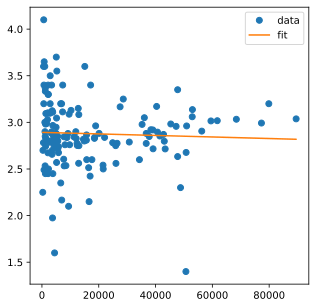

In [200]:
y = df3["E Score"]

X = df3['GDP']

model_GDP_E = sm.OLS(y,sm.add_constant(X))
results_GDP_E = model_GDP_E.fit()
print(results_GDP_E.summary())
r_GDP_E = results_GDP_E.resid
bhat, ahat = results_GDP_E.params

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(X,y,"o",label="data")
ax.plot(X,X*ahat + bhat,"-",label="fit") 
ax.legend()

                            OLS Regression Results                            
Dep. Variable:                A Score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8074
Date:                Mon, 29 May 2023   Prob (F-statistic):              0.370
Time:                        12:39:30   Log-Likelihood:                -78.242
No. Observations:                 149   AIC:                             160.5
Df Residuals:                     147   BIC:                             166.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7851      0.045     84.185      0.0

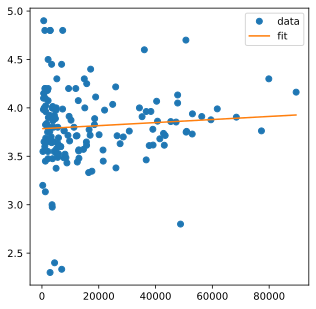

In [201]:
y = df3["A Score"]

X = df3['GDP']

model_GDP_A = sm.OLS(y,sm.add_constant(X))
results_GDP_A = model_GDP_A.fit()
print(results_GDP_A.summary())
r_GDP_A = results_GDP_A.resid
bhat, ahat = results_GDP_A.params

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(X,y,"o",label="data")
ax.plot(X,X*ahat + bhat,"-",label="fit") 
ax.legend()

                            OLS Regression Results                            
Dep. Variable:                E Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1093
Date:                Mon, 29 May 2023   Prob (F-statistic):              0.741
Time:                        14:53:16   Log-Likelihood:                -60.710
No. Observations:                 149   AIC:                             125.4
Df Residuals:                     147   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8758      0.031     92.003      0.0

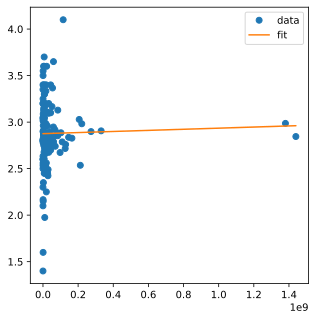

In [18]:
y = df3["E Score"]

X = df3['Population']

model_GDP_E = sm.OLS(y,sm.add_constant(X))
results_GDP_E = model_GDP_E.fit()
print(results_GDP_E.summary())
r_GDP_E = results_GDP_E.resid
bhat, ahat = results_GDP_E.params

fig,ax = plt.subplots(figsize=(5,5))
ax.plot(X,y,"o",label="data")
ax.plot(X,X*ahat + bhat,"-",label="fit") 
ax.legend()